In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 13.5

base_acc_time = [0.396, 0.8492]
ds_acc_time = [0.8, 0.8492]

In [2]:
income_acc_df = pd.read_csv("income_flower_acc.txt").iloc[:, 1]

income_acc_arr = []
for i in range(len(income_acc_df)):
    cur_val = float(income_acc_df[i][10:])
    income_acc_arr.append(cur_val)

In [3]:
income_time_df = pd.read_csv("income_flower_time.txt").iloc[:, 0]

income_time_arr = []
for i in range(len(income_time_df)):
    cur_val = float(income_time_df[i][5:])
    income_time_arr.append(cur_val)

for i in range(1, len(income_time_arr)):
    income_time_arr[i] = income_time_arr[i] - income_time_arr[0]

In [4]:
openfl_df = pd.read_csv("income_openfl.txt", header=None)
openfl_time_arr = np.array(openfl_df.iloc[:,0])
openfl_acc_arr = np.array(openfl_df.iloc[:,1])

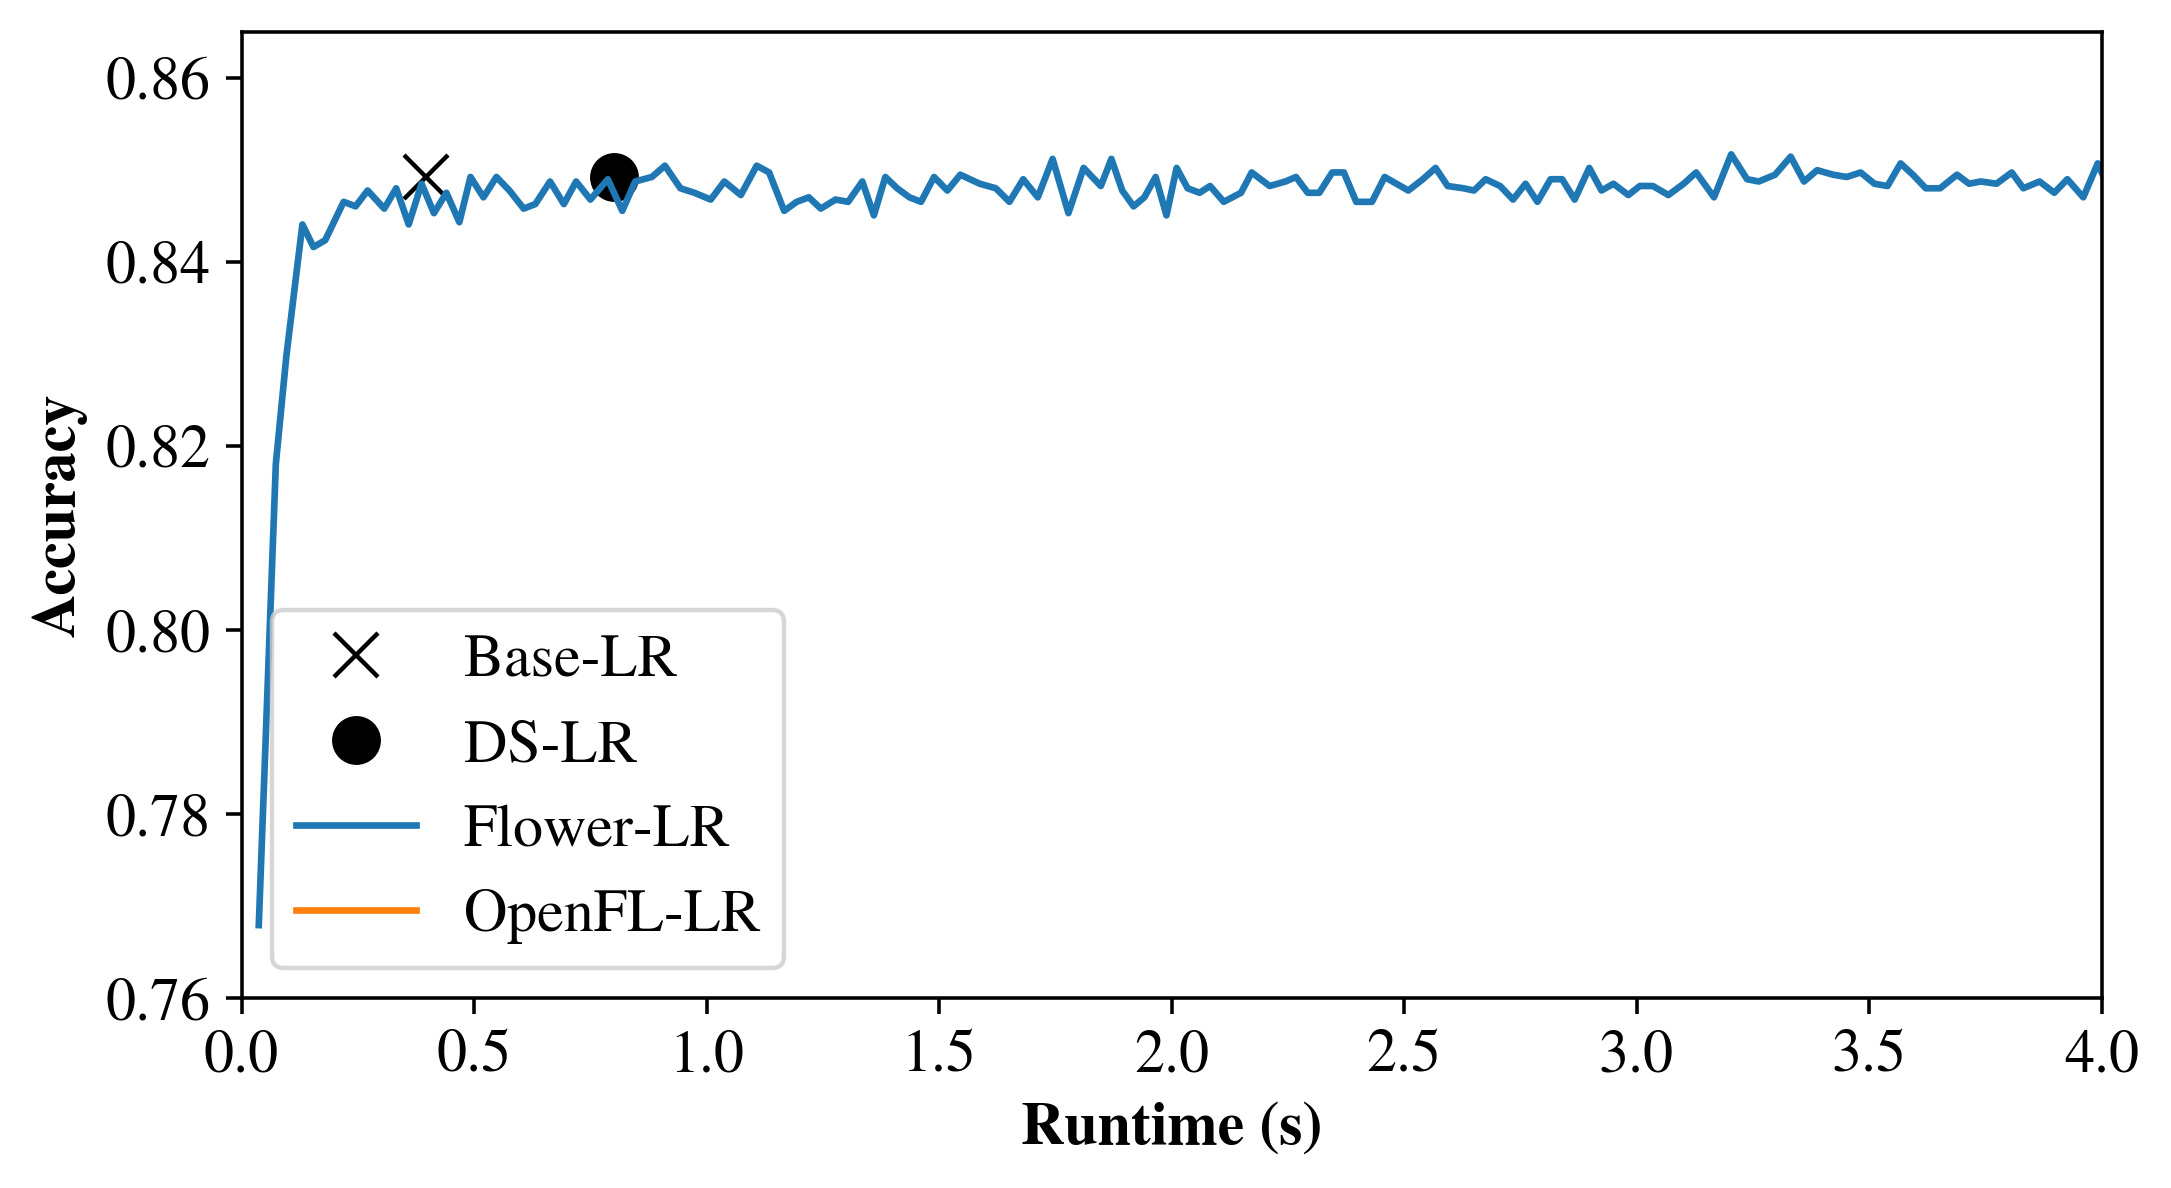

In [5]:
plt.figure(figsize=(7.5, 4), dpi=320)

plt.plot(base_acc_time[0],
         base_acc_time[1],
         marker='x',
         markersize=10,
         color="k",
         linewidth=0,
         label="Base-LR")
plt.plot(ds_acc_time[0],
         ds_acc_time[1],
         marker='o',
         markersize=10,
         color="k",
         linewidth=0,
         label="DS-LR")
plt.plot(income_time_arr[1:], income_acc_arr[1:], label="Flower-LR")
plt.plot(openfl_time_arr, openfl_acc_arr, label="OpenFL-LR")
plt.xlabel("Runtime (s)", fontweight="bold")
plt.ylabel("Accuracy", fontweight="bold")
plt.legend()
plt.xlim([0, 4])
plt.ylim([0.76, 0.865])
plt.savefig("income_8.pdf",
            facecolor="w",
            bbox_inches='tight',)

<Figure size 2400x1280 with 0 Axes>

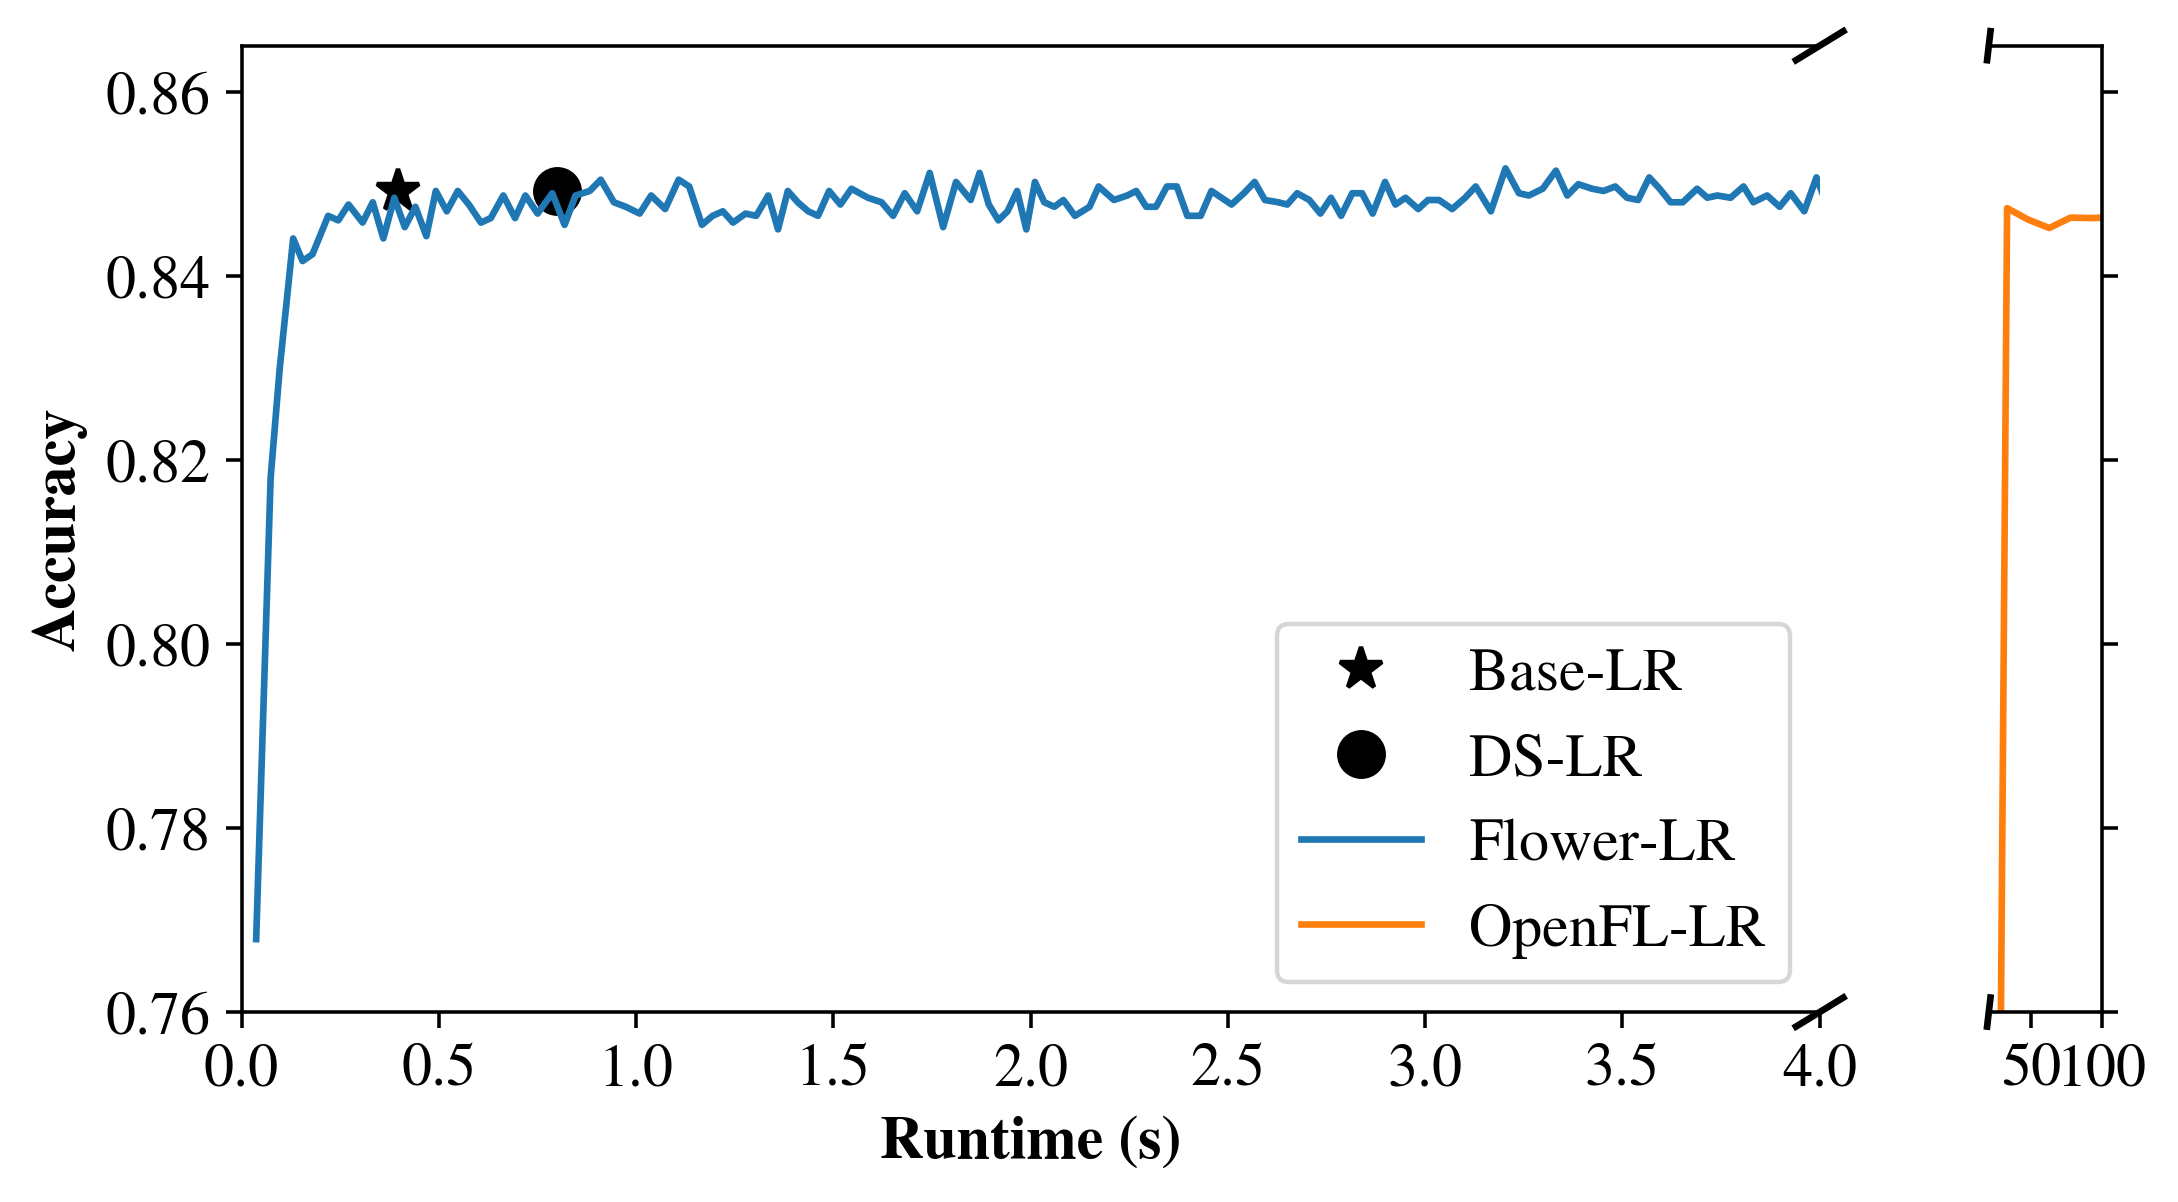

In [7]:
plt.figure(figsize=(7.5, 4), dpi=320)

f, (ax, ax2) = plt.subplots(1, 2, sharey=True,
                            gridspec_kw={'width_ratios': [14, 1]},
                            figsize=(7.5, 4) , dpi=320,)

# ax.set_facecolor([255/255, 235/255, 61/255])
# ax2.set_facecolor([255/255, 235/255, 61/255])

ax.plot(base_acc_time[0],
         base_acc_time[1],
         marker='*',
         markersize=10,
         color="k",
         linewidth=0,
         label="Base-LR")
ax.plot(ds_acc_time[0],
         ds_acc_time[1],
         marker='o',
         markersize=10,
         color="k",
         linewidth=0,
         label="DS-LR")
ax.plot(income_time_arr[1:], income_acc_arr[1:], label="Flower-LR")
ax.plot(openfl_time_arr, openfl_acc_arr, label="OpenFL-LR")

ax2.plot(base_acc_time[0],
         base_acc_time[1],
         marker='*',
         markersize=10,
         color="k",
         linewidth=0,
         label="Base-LR")
ax2.plot(ds_acc_time[0],
         ds_acc_time[1],
         marker='o',
         markersize=10,
         color="k",
         linewidth=0,
         label="DS-LR")
ax2.plot(income_time_arr[1:], income_acc_arr[1:], label="Flower-LR")
ax2.plot(openfl_time_arr, openfl_acc_arr, label="OpenFL-LR")

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright=False)  # don't put tick labels at the top
ax2.yaxis.tick_right()

d = .015  # how big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)  # bottom-right diagonal

ax.set_xlim(0, 4)
ax2.set_xlim(20, 100)
ax.set_ylim(0.76, 0.865)
ax2.set_ylim(0.76, 0.865)

ax.set_xlabel("Runtime (s)", fontweight="bold")
ax.set_ylabel("Accuracy", fontweight="bold")
ax.legend(loc=4)
plt.savefig("income_8.pdf",
            # facecolor=[255/255, 235/255, 61/255],
            bbox_inches='tight',)